# Symmetrize affinities

This function have the following cost:
* adds: $\frac{N \cdot(N-1)}{2} + N^2$
* divisions: $N^2$
* total: $\frac{N \cdot(N-1)}{2} + 2N^2$

So:
$$W = \frac{N \cdot(N-1)}{2} + 2N^2 flops$$

The memory traffic is computed taking into account that there is warm cache (on the previous step the whole input matrix have been accessed so it should be in cache):
$$Q = 1$$

And so the operational intensity is:
$$I \approxeq \frac{N \cdot(N-1)}{2} + 2N^2  \text{flops/byte}$$
The computation will be **compute bound**.


In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from visualization import plot

mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

In [30]:
# Define fixed variables of the problem
T = 1000

Lets define the flops depending on the input size.

In [31]:
def get_flops(N):
    W =  (N * (N - 1)) / 2  +  2 * (N**2)
    return W

Lets import the runtime of each function.

In [32]:
data = pd.read_csv("./bench.csv")
data

,N,base_version,unrolling,blocking
0,8,5.270000e+02,4.230000e+02,322.0
1,16,1.930000e+03,8.390000e+02,907.0
2,32,7.813000e+03,2.263000e+03,10624.0
3,64,2.966800e+04,8.083000e+03,9921.0
4,128,1.320990e+05,4.252600e+04,39394.0
5,256,6.015740e+05,3.804280e+05,161861.0
6,512,4.245269e+06,2.044919e+06,657135.0
7,1024,2.437337e+07,9.832610e+06,3372429.0
8,2048,1.143462e+08,5.272361e+07,19274923.0
9,4096,4.811280e+08,2.783608e+08,94775361.0


In [33]:
# Extract the input size
N = data["N"].as_matrix()

In [34]:
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

Cache sizes and limits taking into account that the working set is:
$$W_{set} = N \cdot D + 2 N^2$$

In [35]:
cache_1 = 32 * 2**10    # 32 KB
cache_2 = 256 * 2**10   # 256 KB
cache_3 = 8 * 2**20.    # 8 MB


N_cache1 = np.sqrt(cache_1 / 4 / 2)
N_cache2 = np.sqrt(cache_2 / 4 / 2)
N_cache3 = np.sqrt(cache_3 / 4 / 2)
print(f"Cache 1 limit size: {N_cache1}")
print(f"Cache 2 limit size: {N_cache2}")
print(f"Cache 3 limit size: {N_cache3}")

Cache 1 limit size: 64.0
Cache 2 limit size: 181.01933598375618
Cache 3 limit size: 1024.0


## Benchmark 2

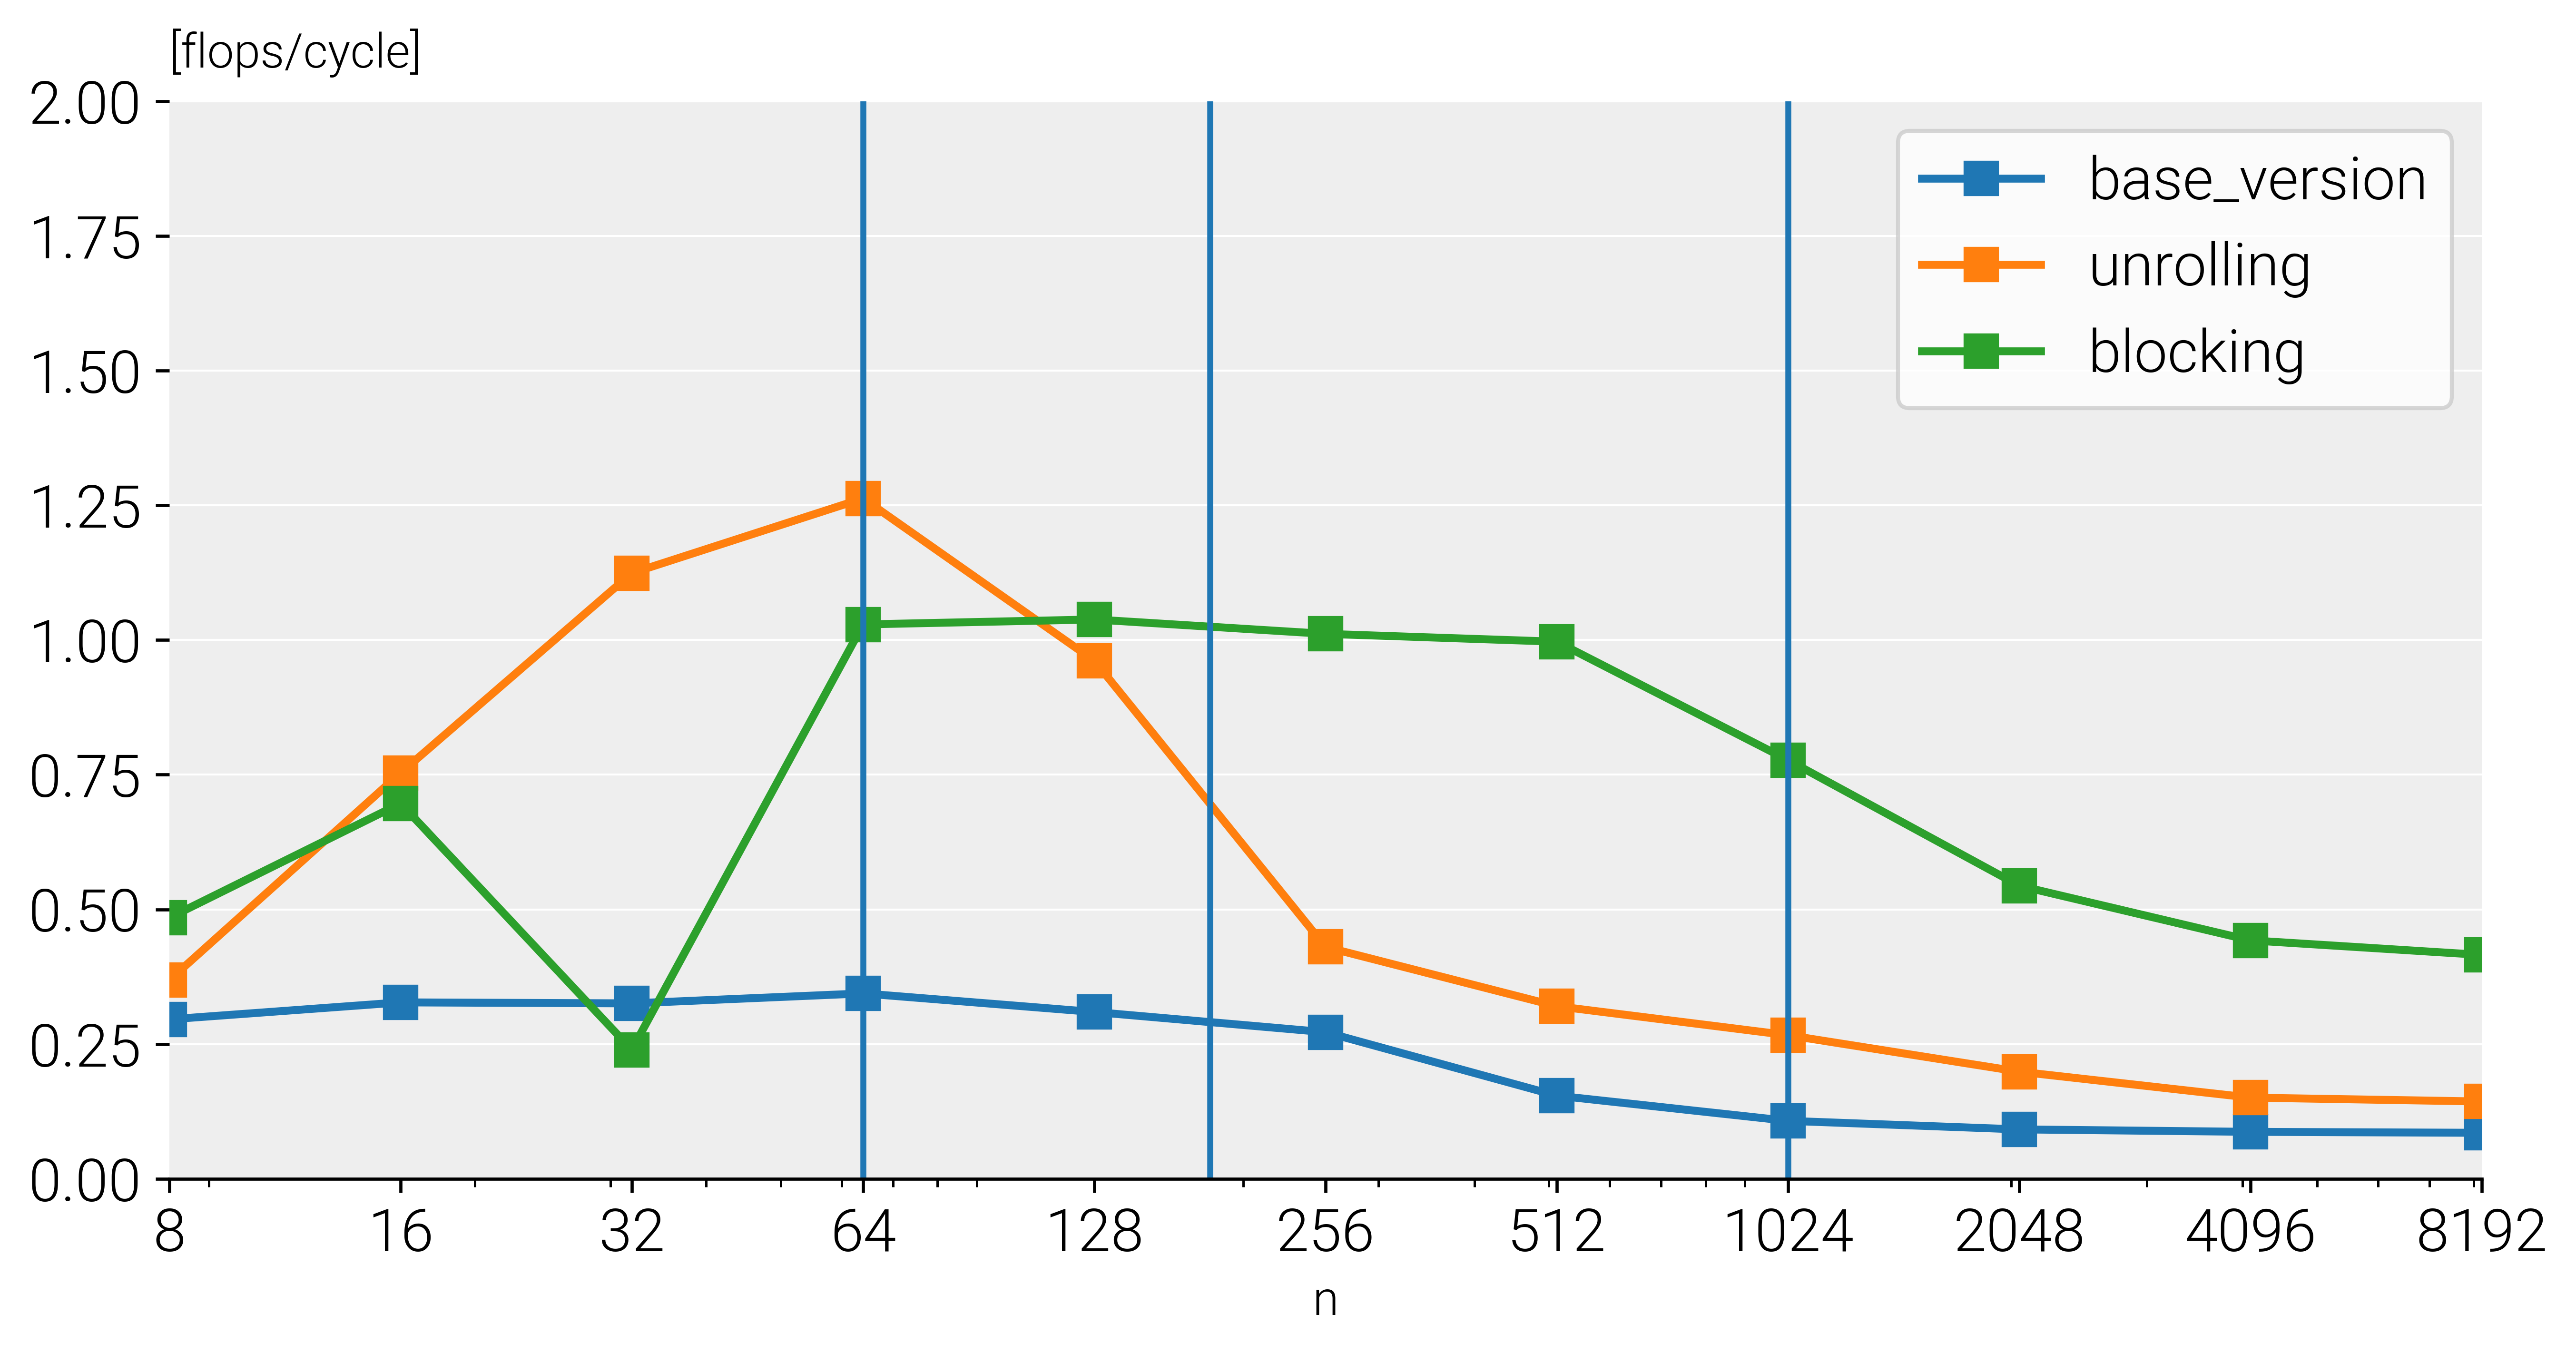

In [36]:
data = pd.read_csv("./bench.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

## Benchmark 3

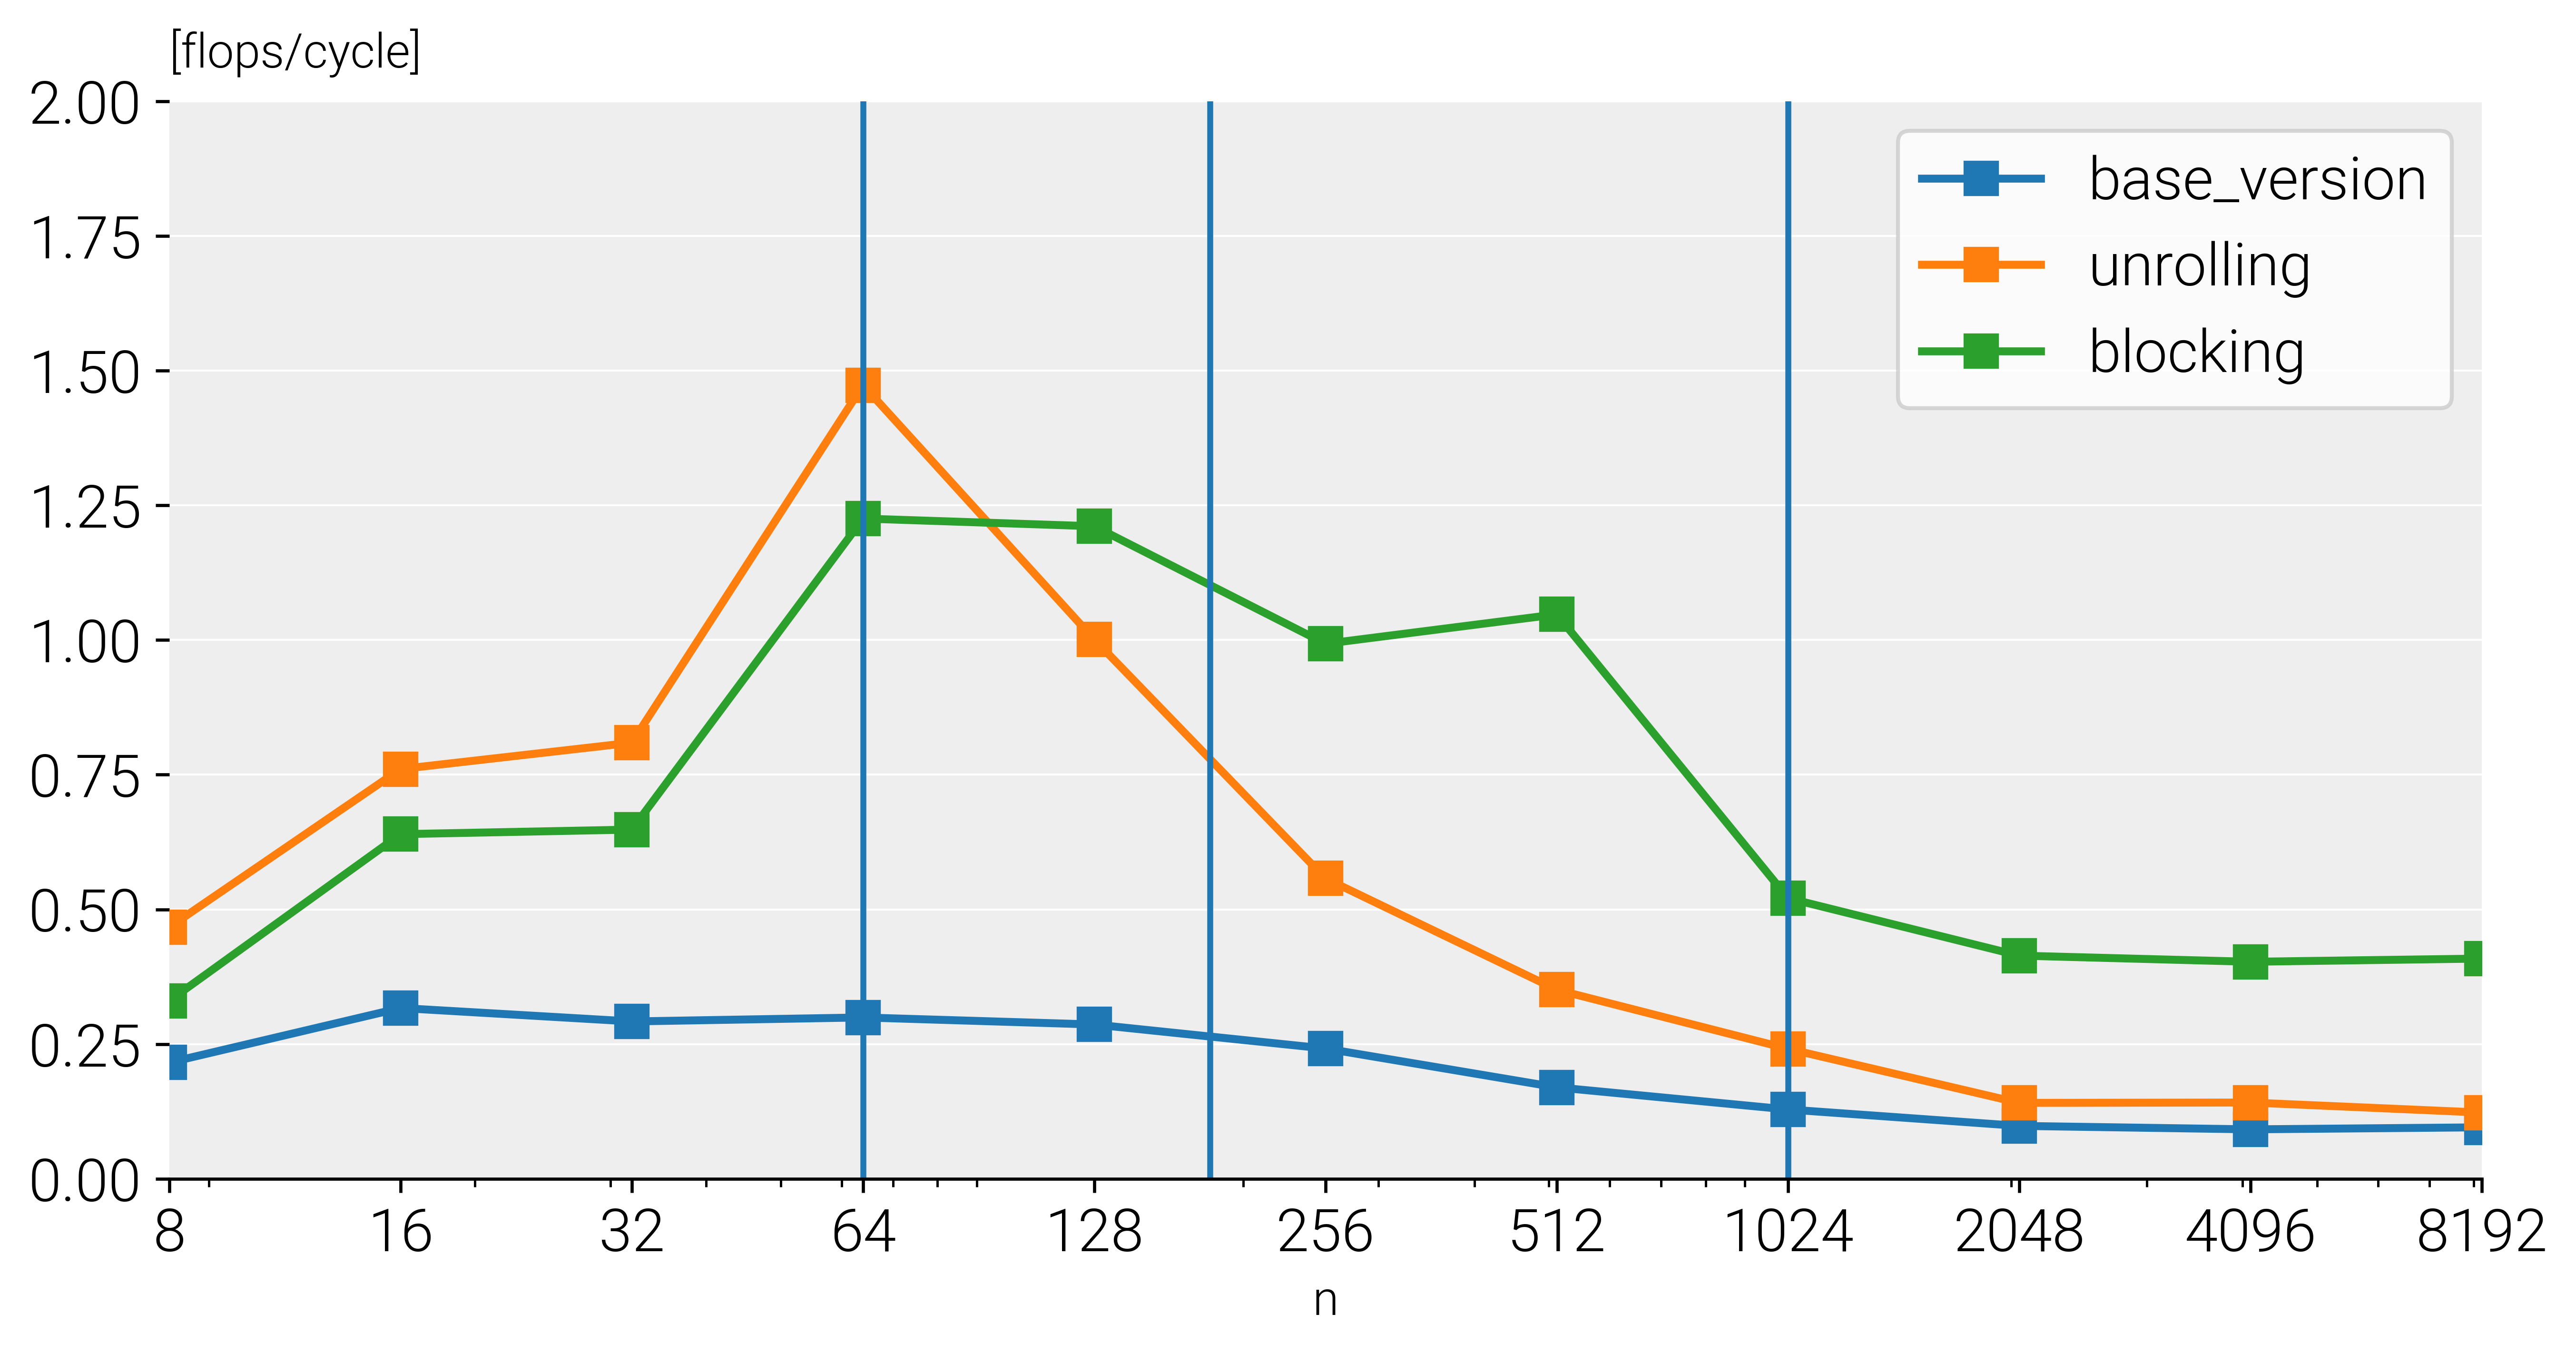

In [12]:
data = pd.read_csv("./bench.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

## Benchmark 4

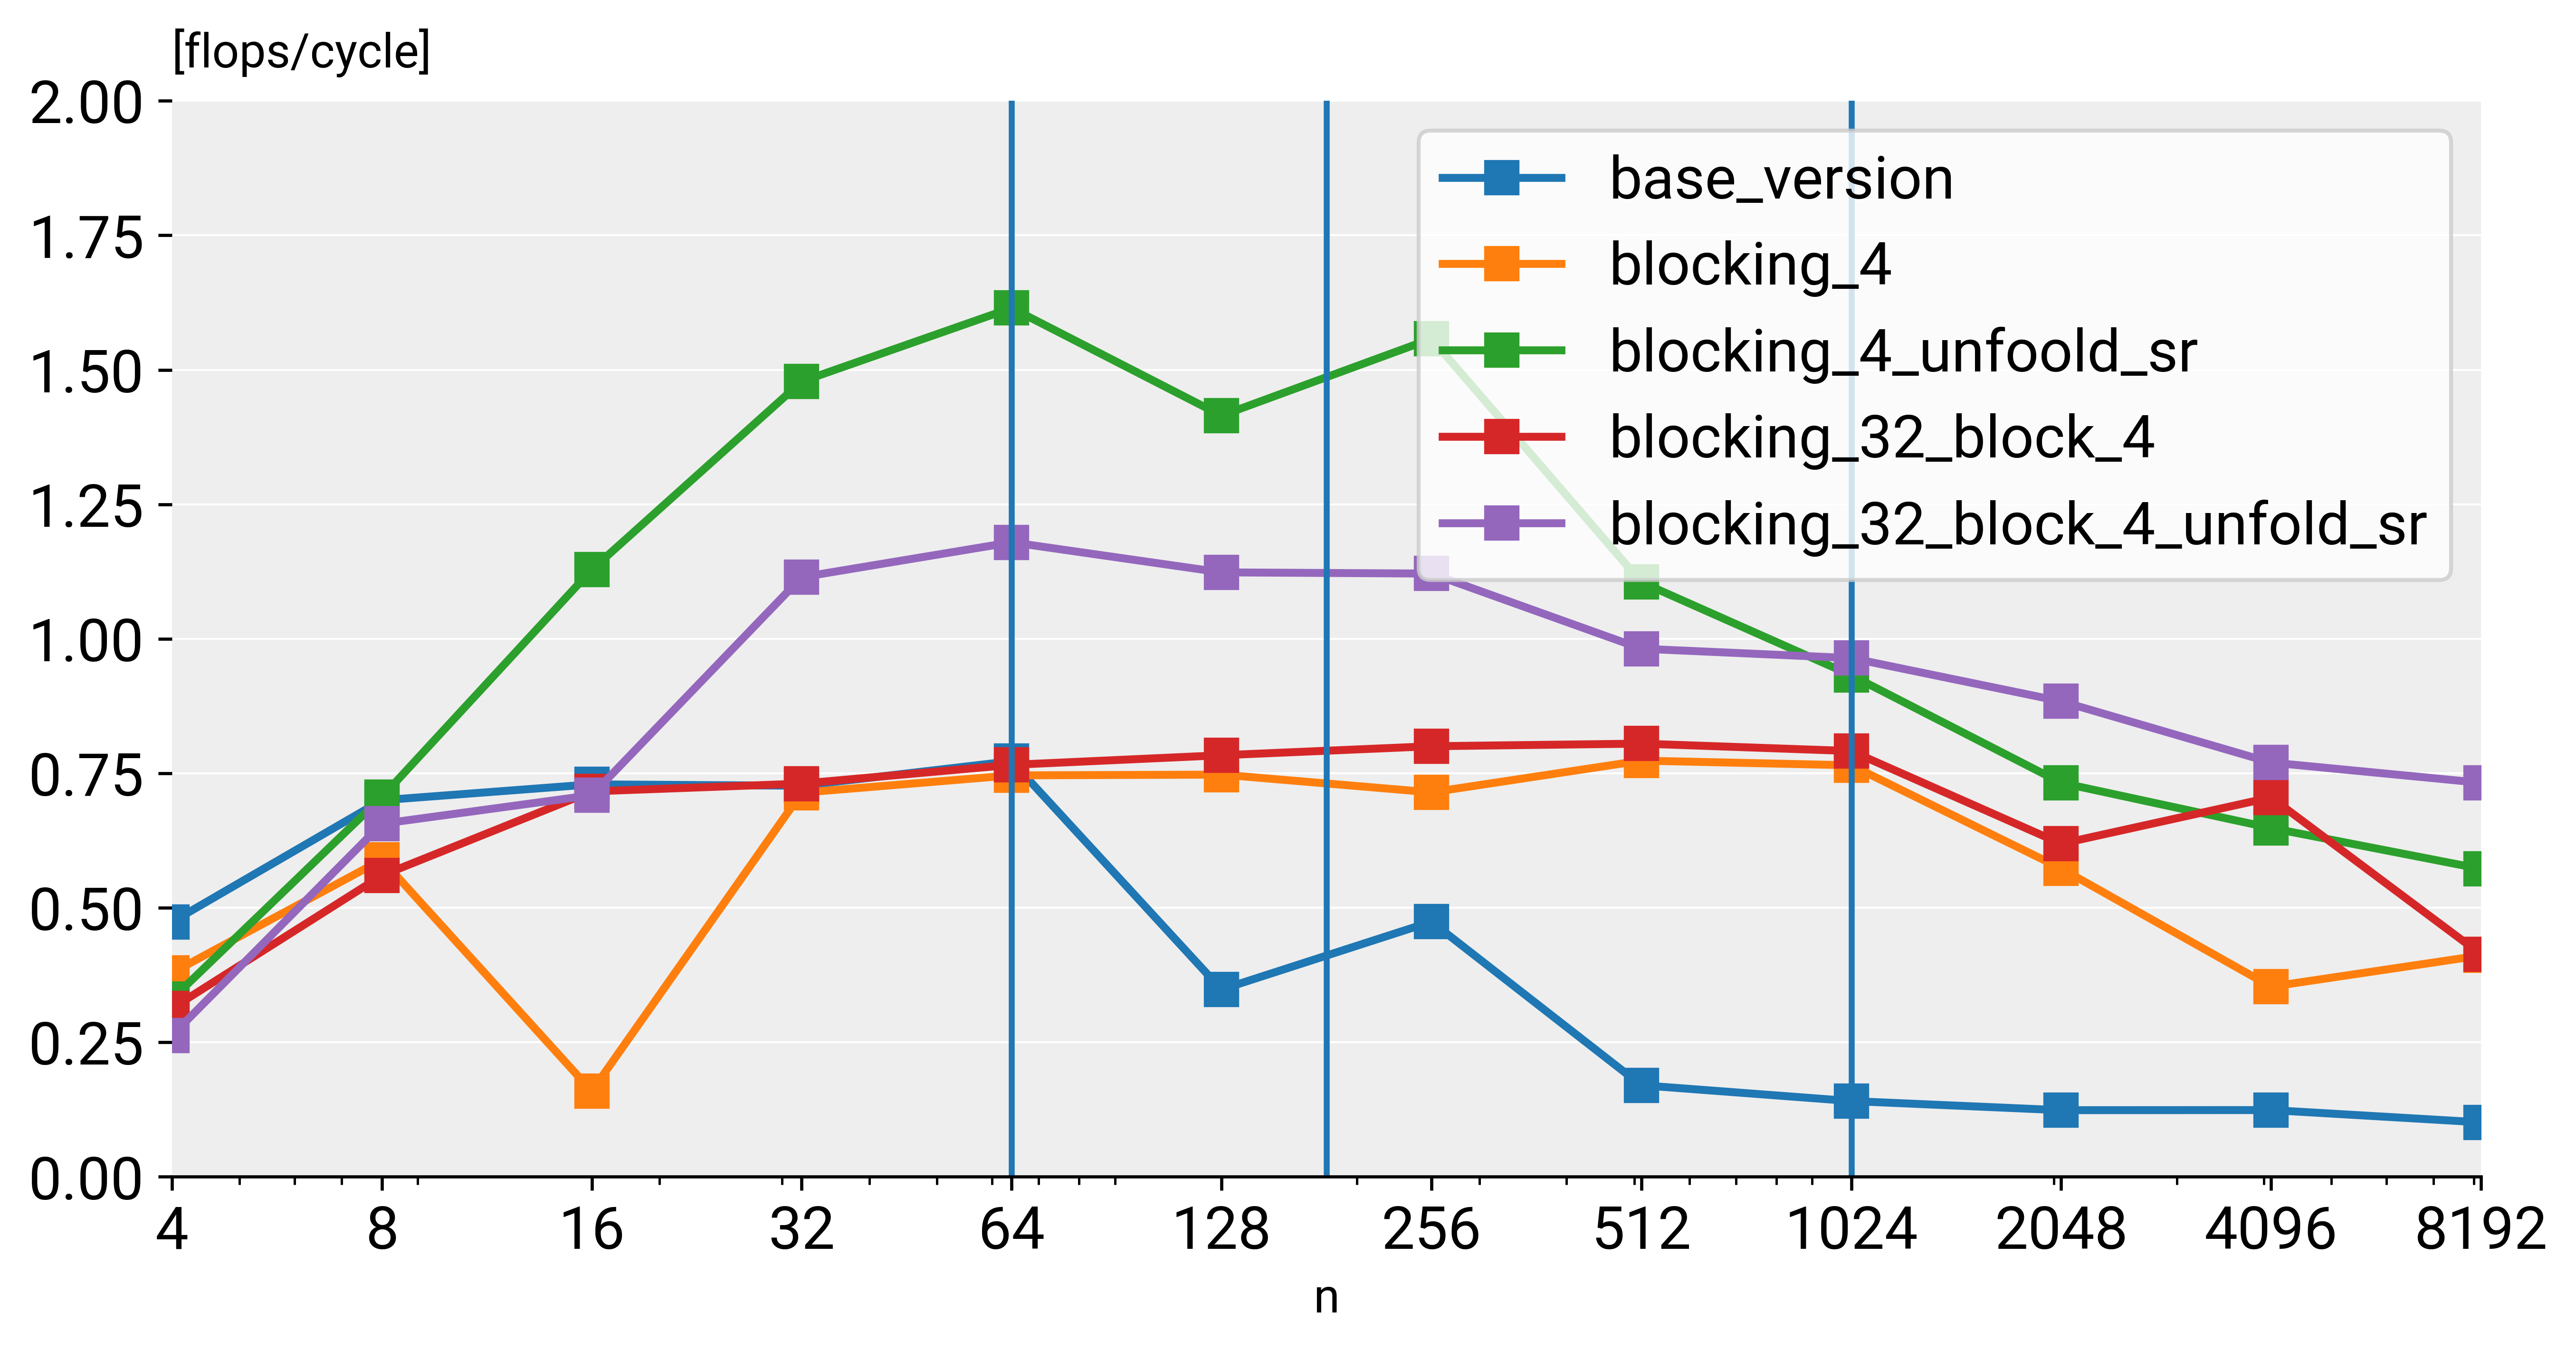

In [19]:
data = pd.read_csv("./bench4.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

# Benchmark 5

Here there has been implemented the vectorized computations for the smaller block of 4 by 4.

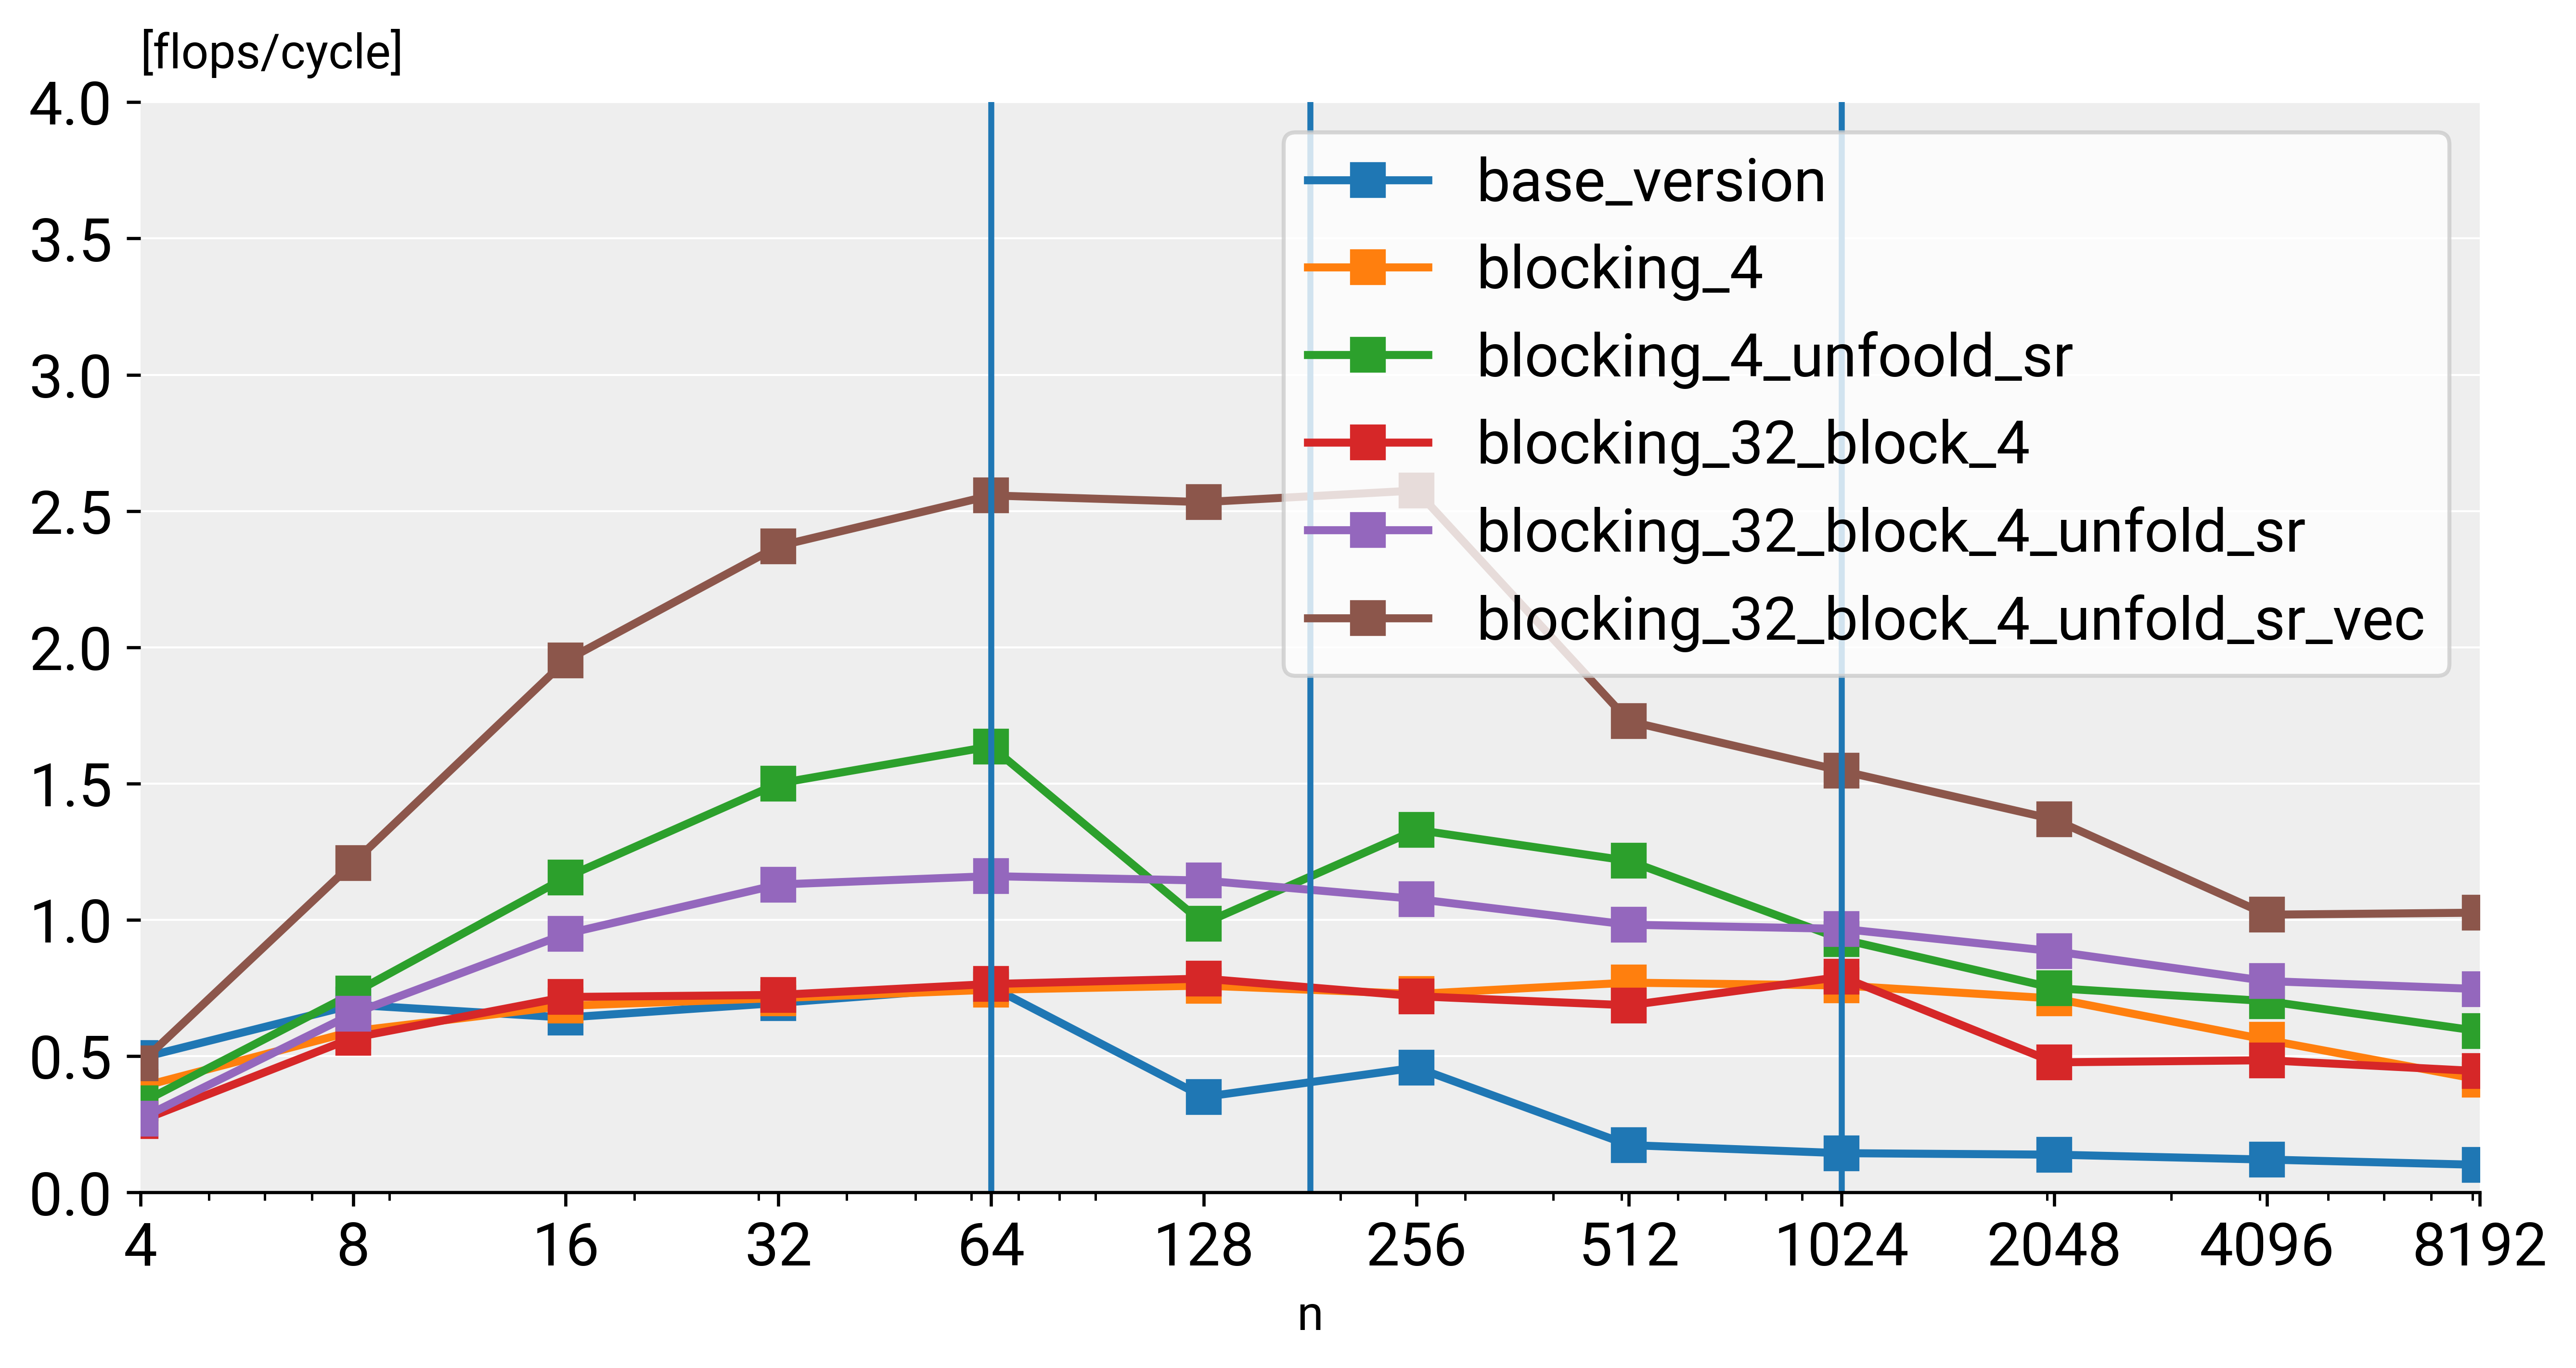

In [22]:
data = pd.read_csv("./bench5.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=4)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

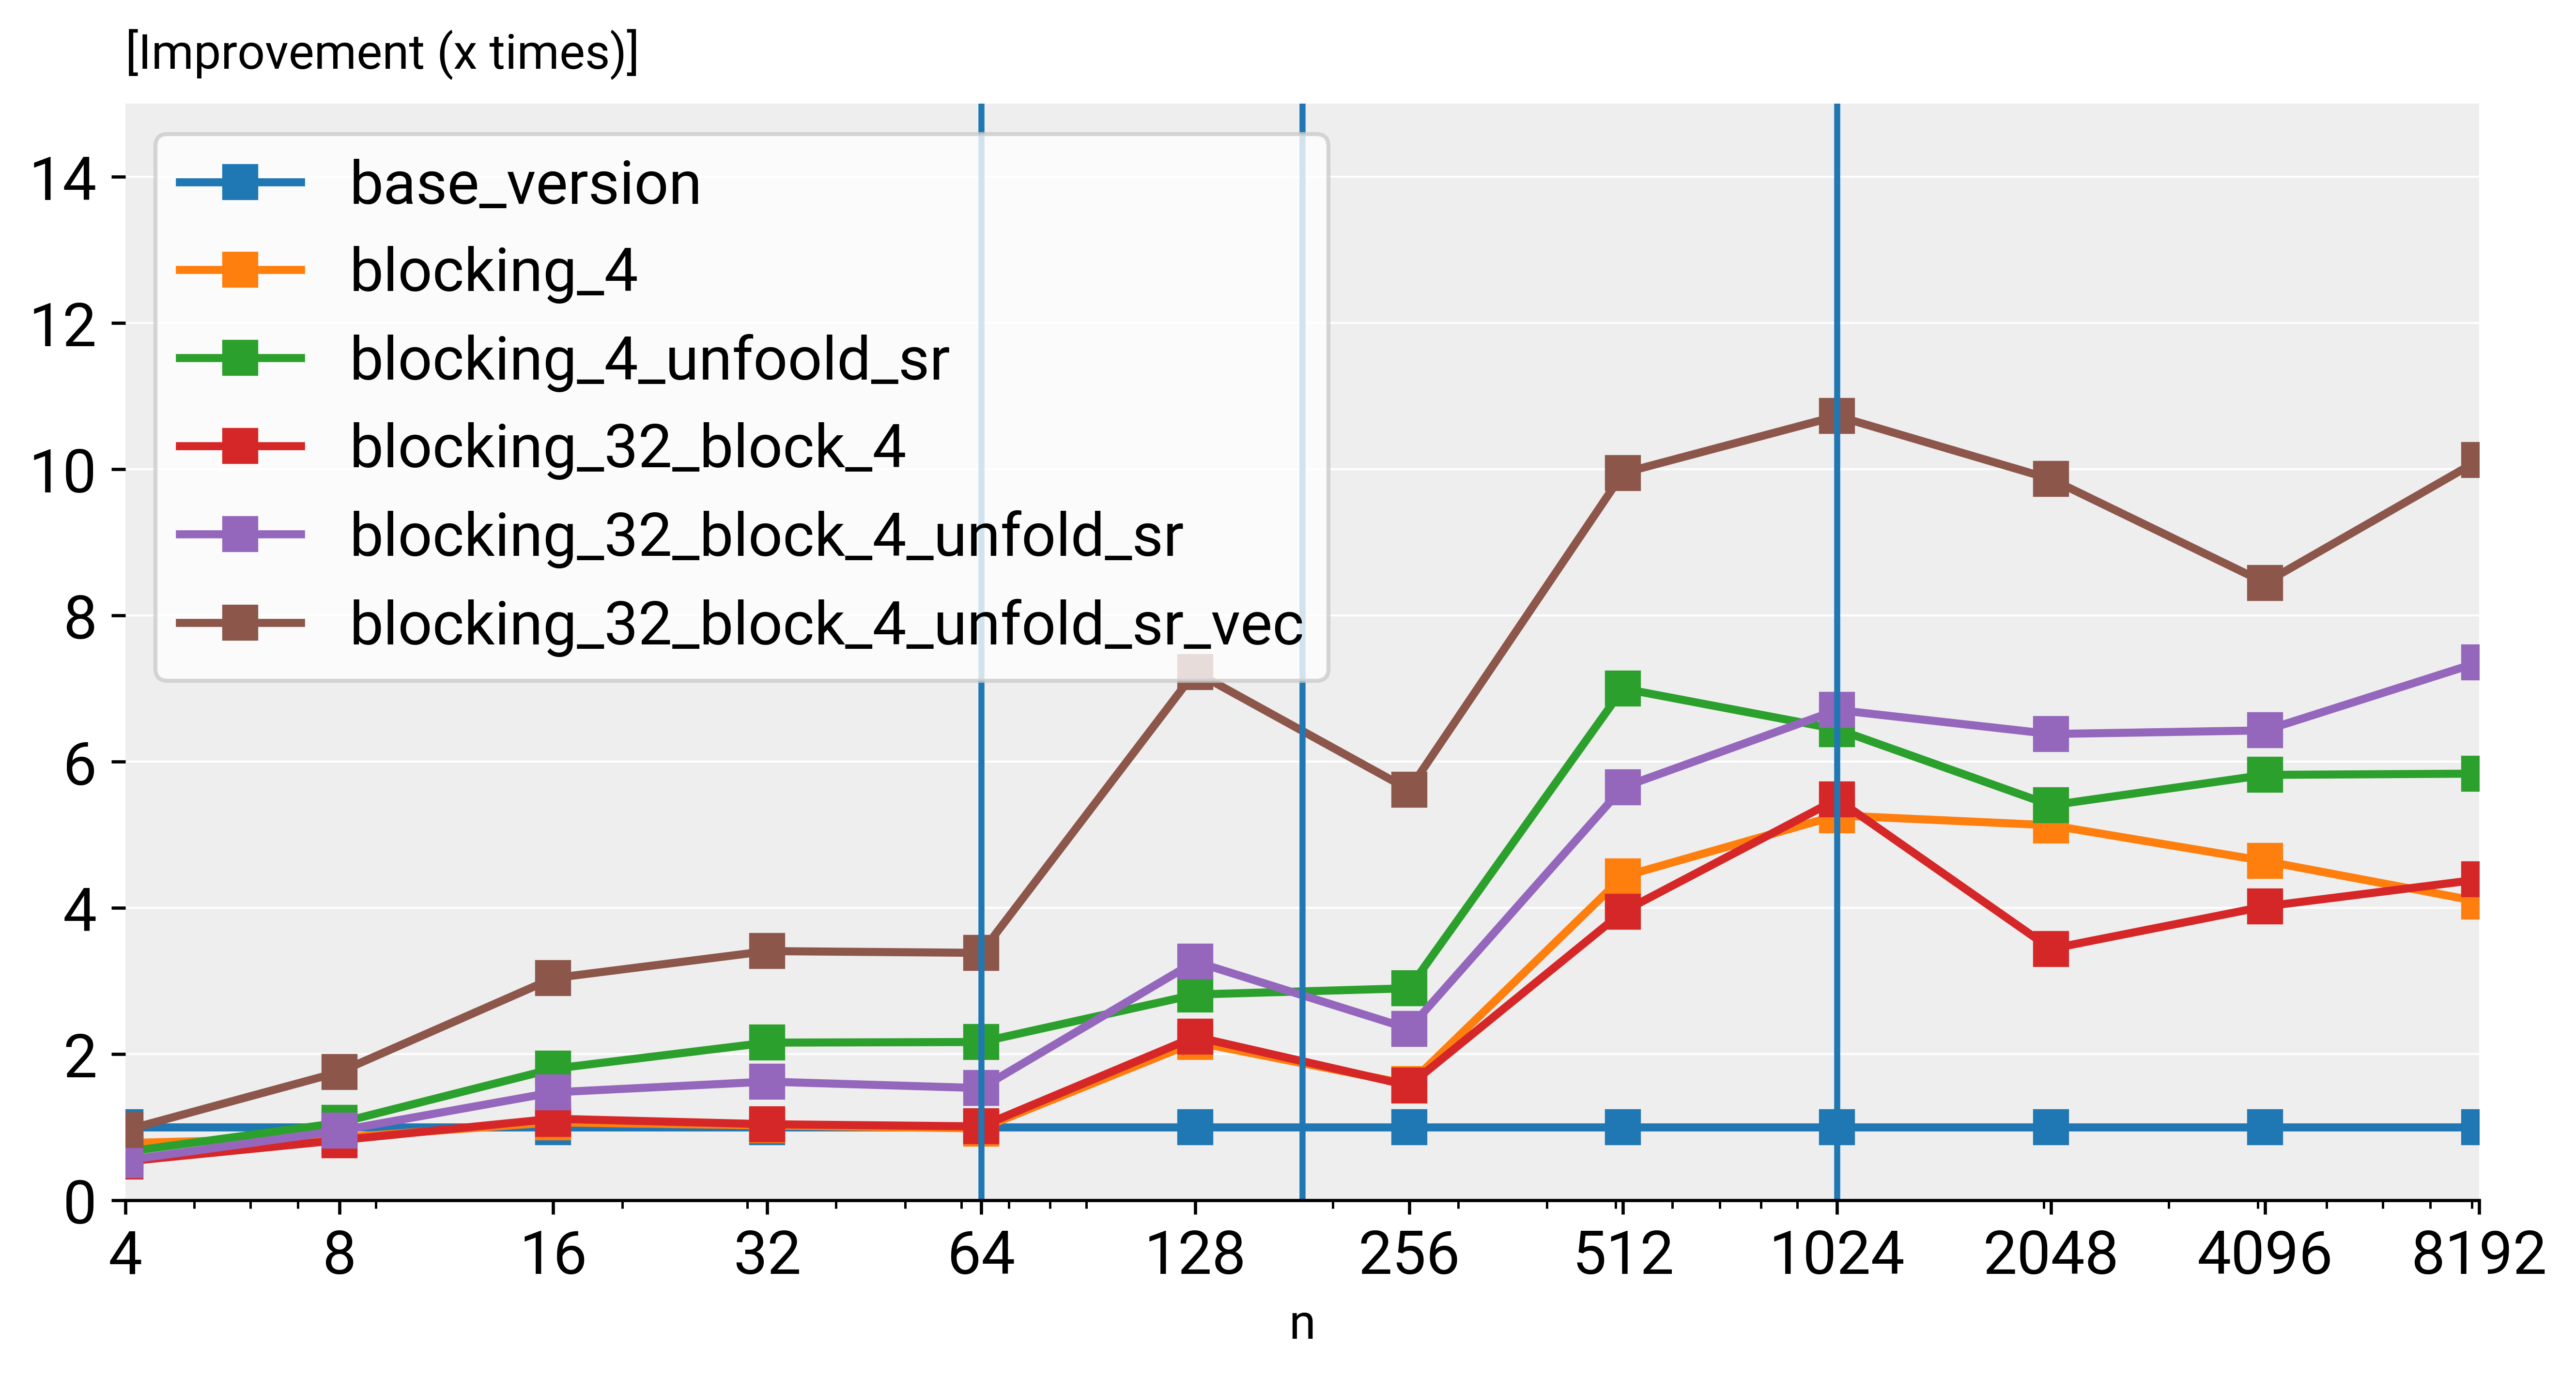

In [24]:
ax = plot(N, perf / perf[0,:], labels=func_names, ylim=15, ylabel="Improvement (x times)")
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

# Benchmark 6

Use different block sizes for blocking and microblocking.

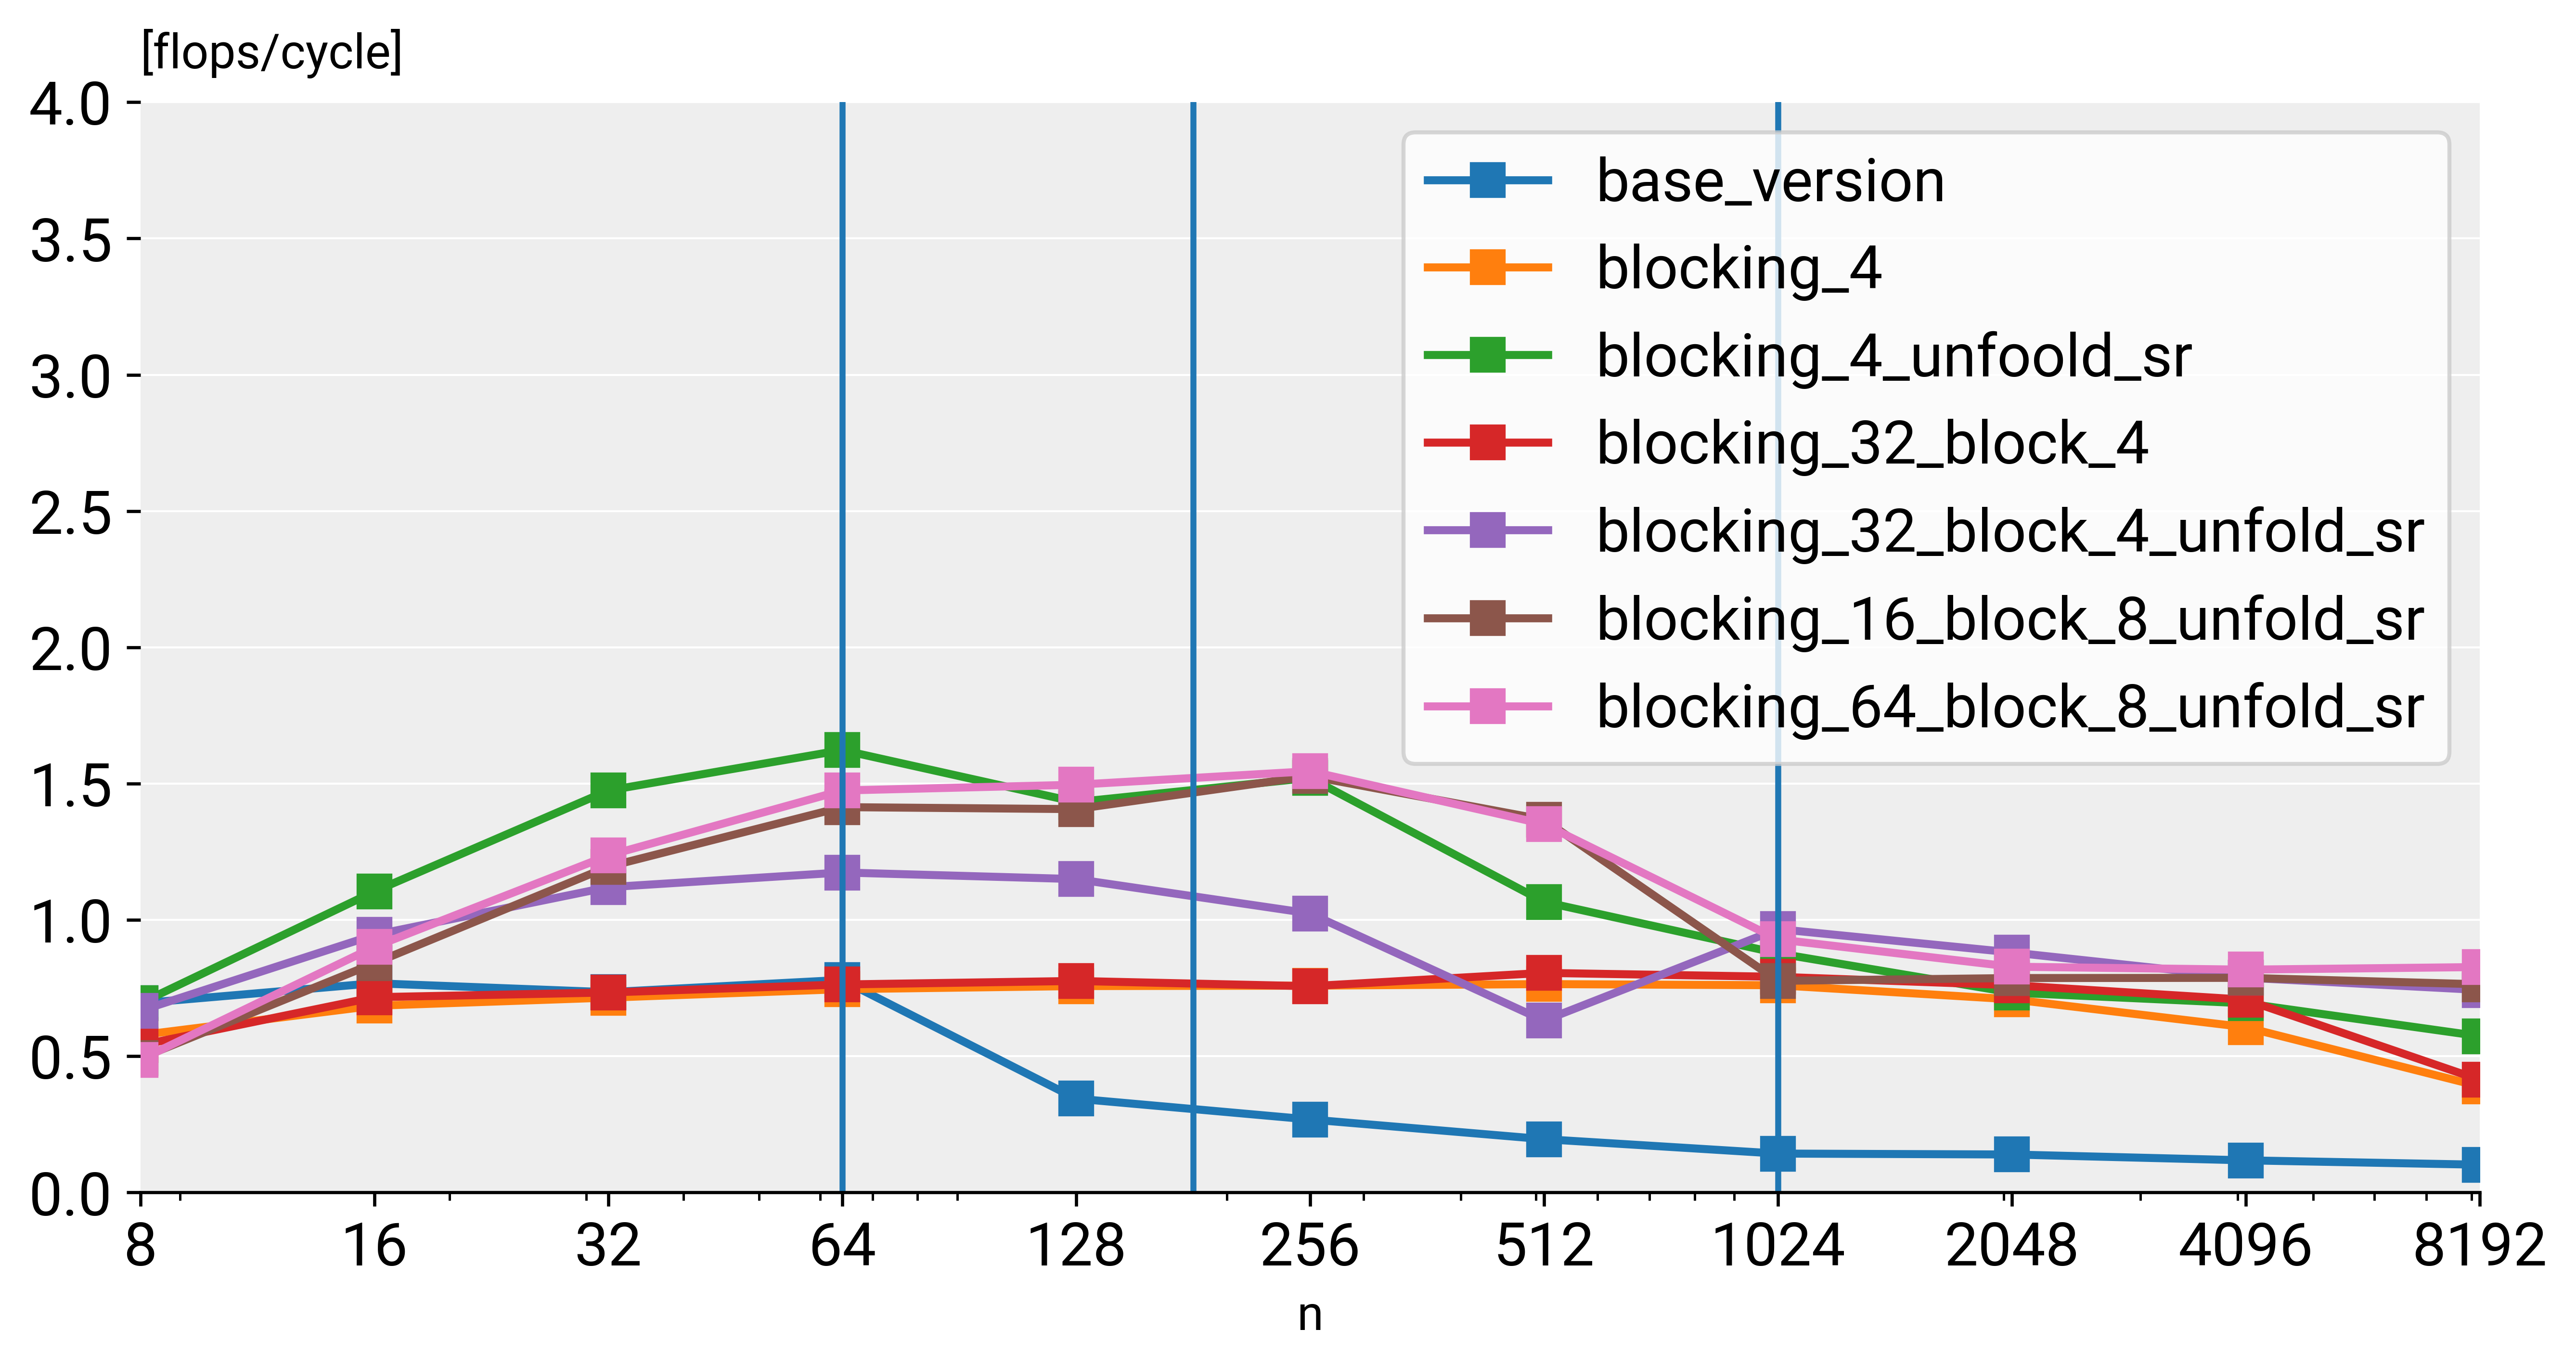

In [25]:
data = pd.read_csv("./bench6.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=4)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()